In [ ]:
#######################################################################################
!pip install torch torchvision torchaudio --quiet
!pip install numpy pandas scikit-learn tqdm matplotlib --quiet
########################################################################################

!git clone https://github.com/HelenGuohx/logbert.git
%cd logbert


!ls


import sys
sys.path.append("/content/logbert")  # Add root folder to Python path


import torch
from bert_pytorch.model.log_model import BERTLog
from bert_pytorch.model.bert import BERT


vocab_size = 10000        # Total unique log keys in your dataset
max_len = 128             # Sequence length
hidden = 768              # Hidden size
n_layers = 12             # Transformer blocks
attn_heads = 12           # Attention heads
dropout = 0.3
is_logkey = True
is_time = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


bert_model = BERT(
    vocab_size=vocab_size,
    max_len=max_len,
    hidden=hidden,
    n_layers=n_layers,
    attn_heads=attn_heads,
    dropout=dropout,
    is_logkey=is_logkey,
    is_time=is_time
).to(device)


model = BERTLog(bert_model, vocab_size=vocab_size).to(device)



dummy_input = torch.randint(0, vocab_size, (2, max_len)).to(device)
time_info = torch.zeros((2, max_len)).to(device)  # Required even if is_time=False

output = model(dummy_input, time_info)

print("Output type:", type(output))
if isinstance(output, torch.Tensor):
    print("Output shape:", output.shape)
else:
    print("Output:", output)


Cloning into 'logbert'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 133 (delta 12), reused 11 (delta 11), pack-reused 78 (from 1)
Receiving objects: 100% (133/133), 211.46 KiB | 1.99 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/logbert
bert_pytorch  environment  img	    logdeep   logparser  README.md  TBird
BGL	      HDFS	   LICENSE  loglizer  Pipfile	 scripts
Using device: cpu
Output type: <class 'dict'>
Output: {'logkey_output': tensor([[[-24.2207, -22.6179, -26.6975,  ..., -23.4482, -11.1916, -15.9454],
         [-40.1652, -39.5339, -17.9192,  ..., -32.2546, -27.3494, -21.8875],
         [-52.6886, -35.7083, -29.8562,  ..., -36.4074, -23.2959, -40.6638],
         ...,
         [-28.7542, -25.9714, -26.5915,  ..., -24.3202, -21.8797, -25.7092],
         [-22.0363, -33.7528, -24.1236,  ..., -26.1340, -14.3363, -28.2919],
         [-11.8079, -24.2777, -23.7662,  ...

In [ ]:
!pip install faiss-cpu --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 42.5 MB/s eta 0:00:00


In [ ]:
# ==============================
#  RAG Imports (REAL, CPU-friendly)
# ==============================
import json, torch, faiss, numpy as np
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# 🔹 Retriever (dense embeddings)
rag_embedder = SentenceTransformer("all-MiniLM-L6-v2")

# 🔹 Generator (lightweight LLM)
rag_tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
rag_generator = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

rag_generator.eval()
print("✅ RAG models loaded")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

✅ RAG models loaded


#correct


#etaaa

In [ ]:
import json
import torch
import numpy as np
from bert_pytorch.model.log_model import BERTLog
from bert_pytorch.model.bert import BERT
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import faiss
from tqdm import tqdm

# ------------------------------
# 1️⃣ Device
# ------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ------------------------------
# 2️⃣ Paths & Params
# ------------------------------
TEST_FILE = "/content/new.json"
MODEL_PATH = "/content/01_model_final1.pt"
TOKENIZER_PATH = "/content/tokenizer.json"
MAX_LEN = 128
BATCH_SIZE = 16
RAG_TOP_K = 3

# ------------------------------
# 3️⃣ Load RAG models
# ------------------------------
rag_embedder = SentenceTransformer("all-MiniLM-L6-v2")
rag_tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
rag_generator = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")
rag_generator.eval()
rag_generator.to(device)
print("✅ Using provided RAG models")

# ------------------------------
# 4️⃣ Load tokenizer & vocab
# ------------------------------
with open(TOKENIZER_PATH, "r") as f:
    log2idx = json.load(f)
idx2log = {v: k for k, v in log2idx.items()}
PAD_ID = log2idx.get("<PAD>", 0)
UNK_ID = log2idx.get("<UNK>", 1)

# ------------------------------
# 5️⃣ Load LogBERT
# ------------------------------
bert_model = BERT(
    vocab_size=len(log2idx),
    max_len=MAX_LEN,
    hidden=66,
    n_layers=4,
    attn_heads=6,
    dropout=0.3,
    is_logkey=True,
    is_time=False
).to(device)

model = BERTLog(bert_model, vocab_size=len(log2idx)).to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()
print("✅ LogBERT loaded successfully")

criterion = torch.nn.CrossEntropyLoss(ignore_index=PAD_ID, reduction="none")

# ------------------------------
# 6️⃣ Token-level anomaly scoring
# ------------------------------
def token_anomaly_score(seq_idx):
    seq = torch.tensor(seq_idx).to(device)
    time = torch.zeros_like(seq).float().to(device)
    with torch.no_grad():
        out = model(seq.unsqueeze(0), time.unsqueeze(0))["logkey_output"]
        loss = criterion(out.view(-1, out.size(-1)), seq.view(-1))
        loss = loss[seq != PAD_ID]
    return loss.cpu().numpy()

# ------------------------------
# 7️⃣ Load and process all sequences
# ------------------------------
all_results = []
rag_corpus = []

for line in tqdm(open(TEST_FILE), desc="Processing sequences"):
    line = line.strip()
    if not line:
        continue
    try:
        item = json.loads(line)
    except json.JSONDecodeError:
        continue

    logs = [log for log in item.get("logs", []) if log != "<PAD>"]  # ignore PAD
    if not logs:
        continue

    # Tokenize each log line
    tokens = []
    for log in logs:
        tokens.extend(log.split())

    seq_idx = [log2idx.get(t, UNK_ID) for t in tokens]
    seq_idx = seq_idx[:MAX_LEN] + [PAD_ID] * max(0, MAX_LEN - len(seq_idx))

    token_losses = token_anomaly_score(seq_idx)
    losses_rounded = [round(float(l), 4) for l in token_losses]

    # Top 5 tokens by contribution
    top_tokens = sorted(zip(tokens, losses_rounded), key=lambda x: x[1], reverse=True)[:5]

    mean_loss = np.mean(losses_rounded) if len(losses_rounded) > 0 else 0.0

    all_results.append({
        "sequence_id": item.get("sequence_id", -1),
        "logs": logs,
        "tokens": tokens,
        "token_losses": losses_rounded,
        "top_anomalous_tokens": top_tokens,
        "mean_loss": mean_loss
    })

    # For RAG retrieval
    rag_corpus.append(" ".join(logs))

print(f"✅ Total sequences processed: {len(all_results)}")

# ------------------------------
# 8️⃣ Build FAISS index for RAG
# ------------------------------
if rag_corpus:
    embeddings = rag_embedder.encode(rag_corpus, convert_to_numpy=True)
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)
    print("✅ FAISS index built")
else:
    print("⚠️ No logs for FAISS")

def rag_retrieve(query, k=RAG_TOP_K):
    if not rag_corpus:
        return []
    q = rag_embedder.encode([query])
    _, idx = index.search(q, k)
    return [rag_corpus[i] for i in idx[0]]

# ------------------------------
# 9️⃣ Dynamic 80-20 threshold
# ------------------------------
all_mean_losses = [res["mean_loss"] for res in all_results]
ANOMALY_THRESHOLD = 1
print(f"📊 Dynamic anomaly threshold (80th percentile): {ANOMALY_THRESHOLD:.4f}")

# ------------------------------
# 10️⃣ RAG explain & print
# ------------------------------
def rag_explain_classify(res):
    classification = "Anomalous" if res["mean_loss"] > ANOMALY_THRESHOLD else "Normal"
    if classification == "Normal":
        print(f"Sequence ID: {res['sequence_id']} - Normal")
        return {"sequence_id": res["sequence_id"], "classification": classification}

    top_tokens_str = ", ".join([f"{t}:{l:.4f}" for t, l in res["top_anomalous_tokens"]])

    print(f"Sequence ID: {res['sequence_id']}")
    print("Logs:")
    for log in res["logs"]:
        print("  ", log)
    print("Top 5 token contributions:", top_tokens_str)
    print("Classification:", classification)

    query_logs = " ".join(res["logs"])
    similar_logs = rag_retrieve(query_logs)
    context_text = "\n".join(similar_logs) if similar_logs else "No similar historical logs found."

    prompt = f"""
Log sequence:
{query_logs}

Top anomalous tokens:
{top_tokens_str}

Similar historical logs:
{context_text}

Explain why this sequence might be anomalous in plain language.
"""
    inp = rag_tokenizer(prompt, return_tensors="pt", truncation=True, padding=True)
    inp = {k: v.to(device) for k, v in inp.items()}

    with torch.no_grad():
        out = rag_generator.generate(
            **inp,
            max_new_tokens=120,
            do_sample=True,
            top_p=0.9,
            temperature=0.7
        )
    explanation = rag_tokenizer.decode(out[0], skip_special_tokens=True)
    print("RAG Explanation:", explanation)
    print("-"*80)

    return {
        "sequence_id": res["sequence_id"],
        "logs": res["logs"],
        "mean_loss": round(res["mean_loss"], 4),
        "top_anomalous_tokens": res["top_anomalous_tokens"],
        "classification": classification,
        "rag_explanation": explanation
    }

# ------------------------------
# 11️⃣ Run inference & RAG
# ------------------------------
for i in tqdm(range(0, len(all_results), BATCH_SIZE), desc="Generating RAG explanations"):
    batch = all_results[i:i+BATCH_SIZE]
    for res in batch:
        rag_explain_classify(res)


Using device: cpu
✅ Using provided RAG models
✅ LogBERT loaded successfully


Processing sequences: 182it [00:04, 45.27it/s]


✅ Total sequences processed: 181
✅ FAISS index built
📊 Dynamic anomaly threshold (80th percentile): 1.0000


Generating RAG explanations:   0%|          | 0/12 [00:00<?, ?it/s]

Sequence ID: 10
Logs:
   test 24.35 4386.77 494.59 pass 0 0
   test 52.72 7606.39 463.9 fail 1 1
   package 31.18 4573.59 444.0 fail 0 2
   scan 73.88 6601.79 53.27 pass 0 2
   deploy 55.16 1961.82 112.92 fail 1 2
Top 5 token contributions: 4573.59:6.6171, 31.18:6.5901, 55.16:6.5044, deploy:6.4815, 444.0:6.4667
Classification: Anomalous
RAG Explanation: The first two files are identical and the second two are identical.
--------------------------------------------------------------------------------
Sequence ID: 11
Logs:
   test 87.0 4801.2 147.73 fail 1 3
   build 42.05 1500.02 233.06 fail 1 3
   deploy 32.7 5676.69 159.69 pass 1 2
   scan 69.01 2063.59 50.66 fail 1 0
   test 32.75 1335.15 491.44 pass 0 2
Top 5 token contributions: 5676.69:6.5330, 32.7:6.4963, 32.75:6.4269, test:6.3949, 159.69:6.3931
Classification: Anomalous
RAG Explanation: A: failures in build: fail 1 3 build: fail 1 3 deploy: fail 2 3 scan: fail 2 335.15 491.44 pass 0 2 test 32.75 1335.15 491.44 pass 0 2 test 32.6

Generating RAG explanations:   8%|▊         | 1/12 [01:32<16:52, 92.03s/it]

RAG Explanation: If the last two packages are equal to the last one, they are not in the same queue.
--------------------------------------------------------------------------------
Sequence ID: 26
Logs:
   scan 74.86 4824.69 295.12 fail 0 3
   deploy 63.51 7919.14 401.81 fail 0 1
   test 78.31 3489.61 471.3 pass 0 3
   package 58.72 3982.02 319.31 pass 1 1
   package 76.78 6374.94 93.65 pass 1 0
Top 5 token contributions: 3489.61:6.6308, 78.31:6.6030, 76.78:6.5252, package:6.5031, 471.3:6.4821
Classification: Anomalous
RAG Explanation: There are a lot of ways to identify this pattern.
--------------------------------------------------------------------------------
Sequence ID: 27
Logs:
   package 85.38 7255.89 281.6 fail 1 0
   deploy 66.19 7174.04 52.26 fail 1 0
   build 81.42 4320.05 491.85 pass 0 3
   test 13.42 815.71 380.65 fail 1 1
   scan 65.01 7036.75 177.68 pass 0 0
Top 5 token contributions: 4320.05:6.6719, 81.42:6.6448, 65.01:6.5576, scan:6.5397, 491.85:6.5182
Classificatio

Generating RAG explanations:  17%|█▋        | 2/12 [03:03<15:16, 91.60s/it]

RAG Explanation: The last time the asterisk was pressed was when the package was at the last possible build.
--------------------------------------------------------------------------------
Sequence ID: 42
Logs:
   test 18.43 2385.69 124.12 pass 1 2
   package 41.93 1084.13 211.86 pass 0 1
   scan 62.05 5787.84 158.32 pass 0 1
   scan 87.28 2299.52 66.43 pass 0 1
   scan 65.48 5636.79 180.86 pass 1 1
Top 5 token contributions: 5787.84:6.6001, 62.05:6.5719, 65.48:6.4962, scan:6.4680, 158.32:6.4540
Classification: Anomalous
RAG Explanation: The test was written for the day.
--------------------------------------------------------------------------------
Sequence ID: 43
Logs:
   deploy 42.48 7609.75 406.2 fail 1 1
   deploy 33.01 605.01 125.3 fail 0 1
   deploy 98.6 1229.96 107.2 fail 0 2
   build 38.69 3020.56 339.34 fail 0 2
   test 66.05 344.32 182.63 pass 0 0
Top 5 token contributions: 1229.96:6.6568, 98.6:6.6304, 66.05:6.5371, test:6.5211, 107.2:6.5027
Classification: Anomalous
RAG E

Generating RAG explanations:  25%|██▌       | 3/12 [04:33<13:36, 90.77s/it]

RAG Explanation: This is a historical log with a single page that has been built.
--------------------------------------------------------------------------------
Sequence ID: 58
Logs:
   scan 54.61 321.65 430.86 fail 0 3
   test 15.04 2567.11 56.71 pass 0 2
   package 62.13 3183.0 454.88 fail 0 1
   package 33.19 3279.39 416.32 fail 1 3
   deploy 23.35 6869.79 242.41 pass 1 0
Top 5 token contributions: 3183.0:6.6236, 62.13:6.5956, 23.35:6.5191, deploy:6.4982, 454.88:6.4756
Classification: Anomalous
RAG Explanation: The only thing that's not a problem is the number of packages that have been successfully scanned.
--------------------------------------------------------------------------------
Sequence ID: 59
Logs:
   deploy 26.05 5193.99 146.0 pass 0 2
   deploy 75.61 1287.43 215.01 fail 0 1
   package 40.1 4933.94 197.38 fail 1 0
   scan 24.17 4081.29 55.93 fail 1 2
   test 99.63 5930.82 278.51 pass 1 0
Top 5 token contributions: 4933.94:6.6352, 40.1:6.6083, 99.63:6.5268, test:6.5063,

Generating RAG explanations:  33%|███▎      | 4/12 [05:50<11:23, 85.42s/it]

RAG Explanation: This is a test that was given 1 chance of passing and 1 chance of a build.
--------------------------------------------------------------------------------
Sequence ID: 74
Logs:
   scan 70.69 3413.31 240.94 fail 1 2
   build 95.08 3081.65 364.56 fail 0 1
   package 80.46 7590.08 454.3 pass 1 2
   deploy 50.01 1126.69 495.4 pass 0 2
   deploy 21.99 6151.05 264.03 pass 1 2
Top 5 token contributions: 7590.08:6.5288, 80.46:6.4971, 21.99:6.4266, deploy:6.3951, 454.3:6.3884
Classification: Anomalous
RAG Explanation: This log was an anomalous logging routine.
--------------------------------------------------------------------------------
Sequence ID: 75
Logs:
   build 66.14 2802.15 280.36 fail 1 0
   build 64.33 4106.23 454.87 pass 0 2
   build 57.72 7983.57 168.73 fail 0 0
   scan 62.38 6716.64 431.61 pass 0 3
   test 10.15 5836.53 449.1 pass 1 1
Top 5 token contributions: 7983.57:6.6585, 57.72:6.6352, 10.15:6.5486, test:6.5298, 168.73:6.5048
Classification: Anomalous
RAG E

Generating RAG explanations:  42%|████▏     | 5/12 [06:55<09:05, 77.96s/it]

RAG Explanation: The builder scanned the log as if it were a floppy disk.
--------------------------------------------------------------------------------
Sequence ID: 90
Logs:
   build 90.21 1625.77 266.96 fail 0 0
   deploy 52.09 7195.94 139.94 pass 0 0
   scan 60.21 7086.81 362.91 pass 1 1
   scan 30.19 3609.77 125.05 fail 1 1
   deploy 11.25 4898.75 417.63 fail 0 1
Top 5 token contributions: 7086.81:6.6842, 60.21:6.6597, 11.25:6.5803, deploy:6.5617, 362.91:6.5305
Classification: Anomalous
RAG Explanation: A recent build has the same nagging problem.
--------------------------------------------------------------------------------
Sequence ID: 91
Logs:
   scan 12.69 4745.44 379.37 pass 1 0
   test 63.03 4735.13 456.01 fail 1 3
   build 75.29 555.16 351.82 pass 0 3
   test 66.15 3344.86 367.88 pass 1 3
   deploy 49.39 2194.36 400.44 fail 1 2
Top 5 token contributions: 555.16:6.5285, 75.29:6.4944, 49.39:6.4352, deploy:6.4023, 351.82:6.3904
Classification: Anomalous
RAG Explanation: Usi

Generating RAG explanations:  50%|█████     | 6/12 [08:42<08:47, 87.99s/it]

RAG Explanation: 1.0 3.0 145.0 673.36 0.05 20.53 32.8 13824.9 0.22 768.05 29.0 0.0 7.0 0.0 92.0 73.36 0.05 20.53 32.8 13824.9 0.22 768.05 29.0 0.0 7.0 0.0 92.0 73.36 0.05 20.53 32.8 13824.9 0.22 768.05 29.0 0.0 7.0 0.0 92.0 73.36 0.05 20.53 32.8 13824.9 0.22 768.05 29
--------------------------------------------------------------------------------
Sequence ID: 8
Logs:
   63.0 21.0 21.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 41.0 true
   78.0 6.0 1.0 5.0 192.0 1072.31 0.04 28.21 38.01 30254.54 0.36 1680.81 45.0 6.0 19.0 6.0 20.0 28.0 113.0 79.0 11.0 true
   209.0 26.0 17.0 19.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 47.0 true
   6.0 2.0 1.0 1.0 21.0 82.04 0.17 6.0 13.67 492.27 0.03 27.35 4.0 0.0 0.0 0.0 10.0 5.0 15.0 6.0 3.0 true
   44.0 13.0 13.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 25.0 true
Top 5 token contributions: 19.0:6.3606, 0.0:6.3383, 3.0:6.2398, 6.0:6.2239, 13.0:6.2137
Classification: Anomalo

Generating RAG explanations:  58%|█████▊    | 7/12 [10:17<07:31, 90.32s/it]

RAG Explanation: Pipelines are inactive.
--------------------------------------------------------------------------------
Sequence ID: 8
Logs:
   Task completed successfully.
   Task is currently in progress.
   Task execution failed.
   Task execution failed.
   Task execution failed.
Top 5 token contributions: failed.:6.1781, execution:6.1441, is:6.0140, Task:5.9822, currently:5.9688
Classification: Anomalous
RAG Explanation: The pipeline conditions were not followed.
--------------------------------------------------------------------------------
Sequence ID: 9
Logs:
   Task completed successfully.
   Task is currently in progress.
   Task execution failed.
   Task was skipped due to pipeline conditions.
   Task is currently in progress.
Top 5 token contributions: pipeline:6.1509, to:6.1150, conditions.:6.0275, is:5.9848, due:5.9524
Classification: Anomalous
RAG Explanation: The pipeline conditions in this log sequence are below.
-----------------------------------------------------

Generating RAG explanations:  67%|██████▋   | 8/12 [12:10<06:30, 97.62s/it]

RAG Explanation: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence: USER> Log sequence:
--------------------------------------------------------------------------------
Sequence ID: 5760
Logs:
   TIMESTAMP IP IP 10875 20128 TCP 1284 Data HTTP Nemo repellendus dignissimos odit accusantium autem reprehenderit. Consequuntur maiores quis voluptates delectus accusamus voluptatem harum. Ipsa neque aliquam facilis. IoC Detected 59.42 <USER> Intrusion <USER> B Blocked Low <USER> Mozilla PATH Windows NT 5.0 AppleWebKit PATH KHTML, like Gecko Chrome IP Safari PATH Segment B Visakhapatnam, Manipur IP nan nan Firewall
   TIMESTAMP IP IP 40743 37742 TCP 533 Control DNS Voluptates voluptates cum ipsa necessitatibus dolor eveniet. Eligendi non sit quia incidunt assumenda. nan

Generating RAG explanations:  75%|███████▌  | 9/12 [15:10<06:09, 123.10s/it]

RAG Explanation: IoC Detected 10:01 nan USER> A Blocked High USER> Mozilla PATH Ignored Low USER> Mozilla PATH iPad; U; AppleWebKit PATH KHTML, like Gecko Version PATH Safari PATH Segment A USER> nan USER> nan USER> nan USER> nan USER> nan USER> nan USER
--------------------------------------------------------------------------------
Sequence ID: 1109
Logs:
   TIMESTAMP IP IP 6963 22983 TCP 143 Control DNS Dolore nisi velit earum optio. Optio quae nostrum nam debitis distinctio ullam aperiam. Aperiam consequuntur reiciendis laboriosam. Consequatur alias tempore veniam rem quo sed. IoC Detected 66.05 <USER> Malware <USER> A Blocked Low <USER> Opera PATH X11; Linux i686; mni-IN Presto PATH Version PATH Segment B Tiruppur, Uttarakhand IP nan nan Server
   TIMESTAMP IP IP 38735 31363 TCP 1451 Data DNS Quia doloremque nam corrupti ratione voluptatem natus. Sed suscipit minima maiores accusamus laudantium consequuntur. Non dignissimos ab laboriosam. IoC Detected 77.66 nan Intrusion <USER> B 

Generating RAG explanations:  83%|████████▎ | 10/12 [18:10<04:41, 140.95s/it]

RAG Explanation: AES 0. COMMIT 1 Firefox 1 1 SID_08442 779 UDP 5 2463. COMMIT AES 0. COMMIT 1 Edge 0 0 SID_08443 452 TCP 2 1280. COMMIT nan 0. COMMIT 0 Chrome 0 0 SID_08443 452 TCP 2 1280. COMMIT nan 0. COMMIT 1 Chrome 0 0 SID_08445 537 TCP 3 1470. COMMIT nan
--------------------------------------------------------------------------------
Sequence ID: 1690
Logs:
   SID_08446 329 TCP 9 47. COMMIT nan 0. COMMIT 2 Firefox 0 1
   SID_08447 633 TCP 6 1494. COMMIT DES 0. COMMIT 2 Chrome 0 0
   SID_08448 941 UDP 1 528. COMMIT AES 0. COMMIT 3 Chrome 0 1
   SID_08449 342 TCP 3 488. COMMIT AES 0. COMMIT 0 Edge 0 0
   SID_08450 566 TCP 3 2. COMMIT DES 0. COMMIT 1 Chrome 0 1
Top 5 token contributions: COMMIT:6.8782, 0.:6.7222, TCP:6.6756, 342:6.6662, Edge:6.6544
Classification: Anomalous
RAG Explanation: COMMIT nan 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
-----------------------------------------------------------------------

Generating RAG explanations:  92%|█████████▏| 11/12 [20:36<02:22, 142.29s/it]

RAG Explanation: A look at the log shows a list of possible security issues and possible vulnerabilities.
--------------------------------------------------------------------------------
Sequence ID: 913
Logs:
   Build Docker image
   Push to registry
   Run container scan
   Error: Critical vulnerability detected
   Stop pipeline
   Notify DevSecOps team
   Manual review required
   Workflow failed
   Re-run scheduled
   Workflow completed with warnings
   Publish artifacts
   Archive logs
   Cleanup resources
Top 5 token contributions: DevSecOps:6.2107, Notify:6.1760, Publish:6.1389, team:6.0834, warnings:6.0811
Classification: Anomalous
RAG Explanation: DevSecOps:6.2107, Notify:6.1760, Publish:6.1389, team:6.0834, warnings:6.0811
--------------------------------------------------------------------------------
Sequence ID: 914
Logs:
   Set up Node.js 18
   Install npm packages
   Run ESLint
   Run unit tests
   Run dependency scan
   Error: License violation detected
   Resolve confl

Generating RAG explanations: 100%|██████████| 12/12 [21:01<00:00, 105.13s/it]

RAG Explanation: This is a log of a system that started a logging system for a specific type of device: A logger. A logger is a device that is used to log and control a particular device. A logger is a device that is used to record and control a particular device. A logger is a device that is used to log and control a specific device. A logger is a device that is used to log and control a specific device.
--------------------------------------------------------------------------------


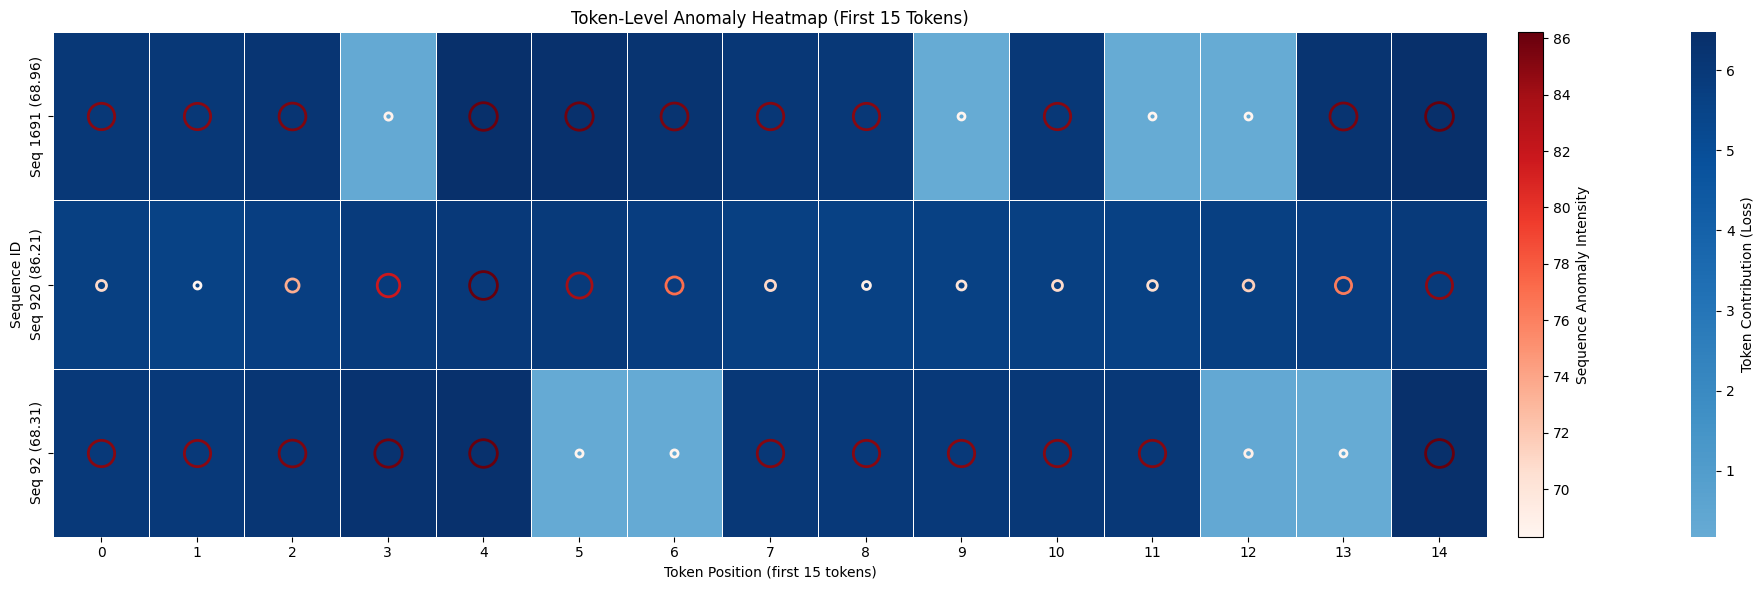

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm

# -----------------------------
# 0️⃣ Constants / Inputs
# -----------------------------
selected_seq_ids = [1691, 920, 92]  # sequences to plot
PAD_TOKEN = "<PAD>"
MAX_TOKENS = 15  # only first 15 tokens for x-axis

# -----------------------------
# 1️⃣ Build heatmap_matrix (first 15 tokens only)
# -----------------------------
heatmap_matrix = []

for seq_id in selected_seq_ids:
    res = next((r for r in all_results if r["sequence_id"] == seq_id), None)
    if not res:
        print(f"Sequence {seq_id} not found!")
        continue

    # Filter PAD tokens and take first 15
    token_losses = [l for t, l in zip(res["tokens"], res["token_losses"]) if t != PAD_TOKEN][:MAX_TOKENS]

    if not token_losses:
        continue

    # Pad to exactly 15 tokens
    token_losses = token_losses + [0] * (MAX_TOKENS - len(token_losses))
    heatmap_matrix.append(token_losses)

heatmap_matrix = np.array(heatmap_matrix)
num_sequences, seq_len = heatmap_matrix.shape

# -----------------------------
# 2️⃣ Normalize token contributions per sequence
# -----------------------------
norm_matrix = np.zeros_like(heatmap_matrix)
for i in range(num_sequences):
    seq_vals = heatmap_matrix[i]
    mask = seq_vals != 0
    if np.any(mask):
        vals = seq_vals[mask]
        norm_vals = (vals - vals.min()) / (vals.max() - vals.min() + 1e-8)
        norm_matrix[i, mask] = norm_vals

# -----------------------------
# 3️⃣ Compute anomaly score per sequence
# -----------------------------
anomaly_scores = np.sum(np.abs(heatmap_matrix), axis=1)
norm_scores = (anomaly_scores - anomaly_scores.min()) / (anomaly_scores.max() - anomaly_scores.min() + 1e-8)

# -----------------------------
# 4️⃣ Plot heatmap
# -----------------------------
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(
    heatmap_matrix,
    cmap="Blues",
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Token Contribution (Loss)'},
    ax=ax
)

# -----------------------------
# 5️⃣ Red circles for high anomaly contributions
# -----------------------------
min_marker, max_marker = 5, 20
for i in range(num_sequences):
    for j in range(seq_len):
        if heatmap_matrix[i, j] != 0:
            intensity = norm_matrix[i, j]
            size = min_marker + intensity * (max_marker - min_marker)
            ax.plot(j + 0.5, i + 0.5, marker='o', markersize=size,
                    markerfacecolor='none',
                    markeredgecolor=cm.Reds(intensity),
                    markeredgewidth=2)

# -----------------------------
# 6️⃣ Rightmost column: sequence anomaly score
# -----------------------------
red_column = norm_scores[:, np.newaxis]
ax.imshow(red_column, cmap='Reds', aspect='auto',
          extent=[seq_len, seq_len+1, 0, num_sequences])

# -----------------------------
# 7️⃣ Y-axis labels with anomaly scores
# -----------------------------
seq_labels = [f"Seq {sid} ({anomaly_scores[i]:.2f})" for i, sid in enumerate(selected_seq_ids)]
ax.set_yticks(np.arange(num_sequences) + 0.5)
ax.set_yticklabels(seq_labels, fontsize=10)

ax.set_xlabel("Token Position (first 15 tokens)")
ax.set_ylabel("Sequence ID")
ax.set_title("Token-Level Anomaly Heatmap (First 15 Tokens)")

# -----------------------------
# 8️⃣ Colorbar for sequence anomaly intensity
# -----------------------------
sm = cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=anomaly_scores.min(), vmax=anomaly_scores.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.05, pad=0.02)
cbar.set_label("Sequence Anomaly Intensity")

plt.tight_layout()
plt.show()


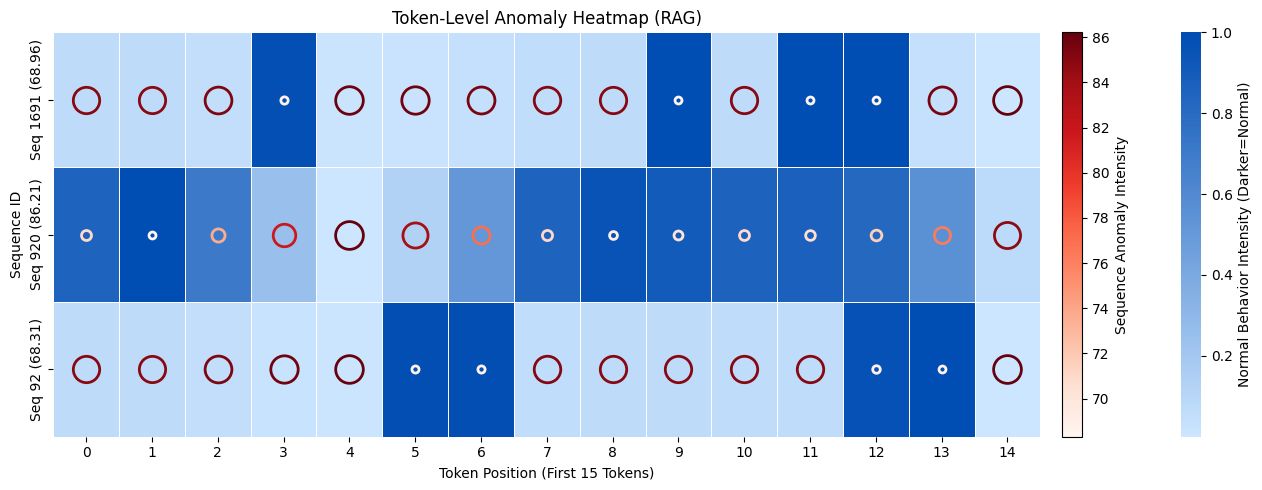

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

# -----------------------------
# 0️⃣ Constants
# -----------------------------
selected_seq_ids = [1691, 920, 92]  # sequences to plot
PAD_TOKEN = "<PAD>"
MAX_TOKENS = 15  # first 15 tokens

# -----------------------------
# 1️⃣ Build heatmap matrix
# -----------------------------
heatmap_matrix = []

for seq_id in selected_seq_ids:
    res = next((r for r in all_results if r["sequence_id"] == seq_id), None)
    if not res:
        continue

    # Filter PAD and take first MAX_TOKENS
    token_losses = [
        l for t, l in zip(res["tokens"], res["token_losses"])
        if t != PAD_TOKEN
    ][:MAX_TOKENS]

    heatmap_matrix.append(token_losses)

# Pad sequences to the same length
max_len = max(len(seq) for seq in heatmap_matrix)
heatmap_matrix = np.array([
    np.pad(seq, (0, max_len - len(seq)), 'constant')
    for seq in heatmap_matrix
])
num_sequences, seq_len = heatmap_matrix.shape

# -----------------------------
# 2️⃣ Normalize for circle intensity
# -----------------------------
norm_matrix = np.zeros_like(heatmap_matrix)
for i in range(num_sequences):
    vals = heatmap_matrix[i]
    mask = vals > 0
    if np.any(mask):
        v = vals[mask]
        norm_matrix[i, mask] = (v - v.min()) / (v.max() - v.min() + 1e-8)

# -----------------------------
# 3️⃣ Normalize for blue shading (normal behavior)
# -----------------------------
# Invert values: low loss = darker blue
blue_matrix = np.zeros_like(heatmap_matrix)
for i in range(num_sequences):
    vals = heatmap_matrix[i]
    mask = vals > 0
    if np.any(mask):
        v = vals[mask]
        norm_vals = (v - v.min()) / (v.max() - v.min() + 1e-8)
        # Invert for shading
        blue_matrix[i, mask] = 1 - norm_vals

# -----------------------------
# 4️⃣ Custom light-sky-blue colormap
# -----------------------------
colors = [(0.8, 0.9, 1.0), (0.0, 0.3, 0.7)]  # light sky blue -> dark blue
cmap = LinearSegmentedColormap.from_list("light_blue_shade", colors)

# -----------------------------
# 5️⃣ Compute anomaly score per sequence
# -----------------------------
anomaly_scores = np.sum(np.abs(heatmap_matrix), axis=1)
norm_scores = (anomaly_scores - anomaly_scores.min()) / (
    anomaly_scores.max() - anomaly_scores.min() + 1e-8
)

# -----------------------------
# 6️⃣ Plot heatmap
# -----------------------------
fig, ax = plt.subplots(figsize=(14, 5))

sns.heatmap(
    blue_matrix,
    cmap=cmap,
    linewidths=0.5,
    cbar_kws={'label': 'Normal Behavior Intensity (Darker=Normal)'},
    ax=ax
)

# -----------------------------
# 7️⃣ Red circles for high anomaly contributions
# -----------------------------
min_marker, max_marker = 5, 20
for i in range(num_sequences):
    for j in range(seq_len):
        if heatmap_matrix[i, j] > 0:
            intensity = norm_matrix[i, j]
            size = min_marker + intensity * (max_marker - min_marker)
            ax.plot(
                j + 0.5, i + 0.5,
                marker='o',
                markersize=size,
                markerfacecolor='none',
                markeredgecolor=cm.Reds(intensity),
                markeredgewidth=2
            )

# -----------------------------
# 8️⃣ Rightmost column: sequence anomaly score
# -----------------------------
ax.imshow(
    norm_scores[:, None],
    cmap='Reds',
    aspect='auto',
    extent=[seq_len, seq_len + 1, 0, num_sequences]
)

# -----------------------------
# 9️⃣ Axis labels
# -----------------------------
ax.set_xlabel("Token Position (First 15 Tokens)")
ax.set_ylabel("Sequence ID")
ax.set_yticks(np.arange(num_sequences) + 0.5)
ax.set_yticklabels([f"Seq {sid} ({anomaly_scores[i]:.2f})"
                    for i, sid in enumerate(selected_seq_ids)])

ax.set_title("Token-Level Anomaly Heatmap (RAG)")

# -----------------------------
# 🔟 Colorbar for sequence anomaly intensity
# -----------------------------
sm = cm.ScalarMappable(cmap='Reds',
                       norm=plt.Normalize(vmin=anomaly_scores.min(),
                                          vmax=anomaly_scores.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.05, pad=0.02)
cbar.set_label("Sequence Anomaly Intensity")

plt.tight_layout()
plt.show()


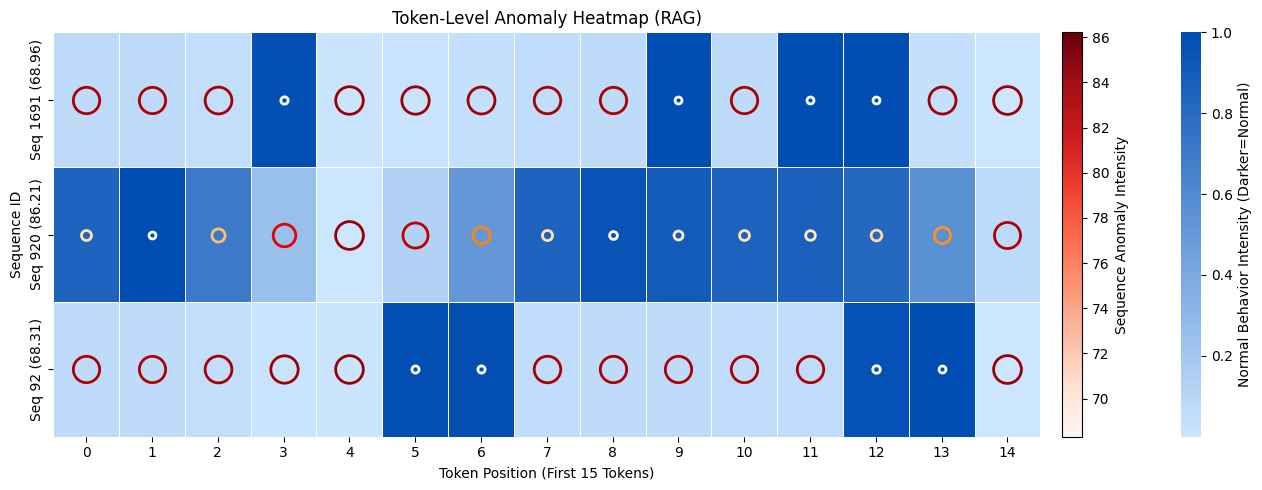

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

# -----------------------------
# 0️⃣ Constants
# -----------------------------
selected_seq_ids = [1691, 920, 92]  # sequences to plot
PAD_TOKEN = "<PAD>"
MAX_TOKENS = 15  # first 15 tokens

# -----------------------------
# 1️⃣ Build heatmap matrix
# -----------------------------
heatmap_matrix = []

for seq_id in selected_seq_ids:
    res = next((r for r in all_results if r["sequence_id"] == seq_id), None)
    if not res:
        continue

    # Filter PAD and take first MAX_TOKENS
    token_losses = [l for t, l in zip(res["tokens"], res["token_losses"]) if t != PAD_TOKEN][:MAX_TOKENS]
    heatmap_matrix.append(token_losses)

# Pad sequences to same length
max_len = max(len(seq) for seq in heatmap_matrix)
heatmap_matrix = np.array([np.pad(seq, (0, max_len - len(seq)), 'constant') for seq in heatmap_matrix])
num_sequences, seq_len = heatmap_matrix.shape

# -----------------------------
# 2️⃣ Normalize token contribution (0=small, 1=high)
# -----------------------------
norm_matrix = np.zeros_like(heatmap_matrix)
for i in range(num_sequences):
    vals = heatmap_matrix[i]
    mask = vals > 0
    if np.any(mask):
        v = vals[mask]
        norm_matrix[i, mask] = (v - v.min()) / (v.max() - v.min() + 1e-8)

# -----------------------------
# 3️⃣ Background blue for normal behavior
# -----------------------------
colors = [(0.8, 0.9, 1.0), (0.0, 0.3, 0.7)]  # light sky blue -> dark blue
cmap_blue = LinearSegmentedColormap.from_list("light_blue_shade", colors)

# -----------------------------
# 4️⃣ Red-orange gradient for anomalies
# -----------------------------
colors_red = [(1,1,1), (1,0.8,0.5), (1,0.5,0), (0.9,0,0), (0.6,0,0)]
cmap_red = LinearSegmentedColormap.from_list("red_orange", colors_red)

# -----------------------------
# 5️⃣ Compute anomaly score per sequence
# -----------------------------
anomaly_scores = np.sum(np.abs(heatmap_matrix), axis=1)
norm_scores = (anomaly_scores - anomaly_scores.min()) / (anomaly_scores.max() - anomaly_scores.min() + 1e-8)

# -----------------------------
# 6️⃣ Plot heatmap
# -----------------------------
fig, ax = plt.subplots(figsize=(14,5))

sns.heatmap(
    1 - norm_matrix,  # darker blue = more normal
    cmap=cmap_blue,
    linewidths=0.5,
    cbar_kws={'label': 'Normal Behavior Intensity (Darker=Normal)'},
    ax=ax
)

# -----------------------------
# 7️⃣ Circles: small contribution → small/light, high → big/dark
# -----------------------------
min_marker, max_marker = 5, 20
for i in range(num_sequences):
    for j in range(seq_len):
        if heatmap_matrix[i, j] > 0:
            intensity = norm_matrix[i, j]
            size = min_marker + intensity * (max_marker - min_marker)  # now big = high contribution
            ax.plot(
                j + 0.5, i + 0.5,
                marker='o',
                markersize=size,
                markerfacecolor='none',
                markeredgecolor=cmap_red(intensity),
                markeredgewidth=2
            )

# -----------------------------
# 8️⃣ Rightmost column: sequence anomaly score
# -----------------------------
ax.imshow(
    norm_scores[:, None],
    cmap='Reds',
    aspect='auto',
    extent=[seq_len, seq_len + 1, 0, num_sequences]
)

# -----------------------------
# 9️⃣ Axis labels
# -----------------------------
ax.set_xlabel("Token Position (First 15 Tokens)")
ax.set_ylabel("Sequence ID")
ax.set_yticks(np.arange(num_sequences) + 0.5)
ax.set_yticklabels([f"Seq {sid} ({anomaly_scores[i]:.2f})" for i, sid in enumerate(selected_seq_ids)])
ax.set_title("Token-Level Anomaly Heatmap (RAG)")

# -----------------------------
# 🔟 Colorbar for sequence anomaly intensity
# -----------------------------
sm = cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=anomaly_scores.min(), vmax=anomaly_scores.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.05, pad=0.02)
cbar.set_label("Sequence Anomaly Intensity")

plt.tight_layout()
plt.show()
